## Flux comparions
This notebook compares the predictions of the R. opacus PD630 GSM with the fluxes from 13C-metabolic flux analysis (13C-MFA)

For each reaction in the metabolic flux analysis, the corresponding genome scale flux is found using mapping syntax similar to GPR when 'or' relations are for recations that happen in parallel, and 'and' relations are for reactions that happen sequentially.

### Methods
For each carbon source
<ol>
    <li>Run FBA to get genome scale fluxes</li>
    <li>Split 'or' relations that can be summed together</li>
    <li>For each 'and' relation find the minimum of the reactions and add that to the reaction flux</li>
    <li>Append the summed flux value to the FBA_flux list</li>
</ol>

### Imports

In [67]:
%matplotlib inline
from matplotlib import pyplot as plt
import cobra
import pandas as pd
import numpy as np
from edd_utils import login, export_study, export_metadata

### Load model 

In [68]:
model = cobra.io.read_sbml_model("../GSMs/Ropacus_annotated_curated_with_phenol_custom_biomass.xml")
model

Name,ropacus_annotated_curated
Memory address,0x07f97d4271090
Number of metabolites,1583
Number of reactions,2385
Number of groups,0
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [69]:
model.medium

{'EX_glc__D_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_h_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_ca2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_cobalt2_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_cu2_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_mobd_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_phenol_e': 1000.0}

In [70]:
# edd_study_slug = 'input-test-study'
# edd_server = 'public-edd.agilebiofoundry.org'
# user= 'garrettroell'
# session = login(edd_server=edd_server, user=user)
# # df = utils.load_study(edd_study_slug=edd_study_slug,edd_server=edd_server,
# #   default_to_system_user=False)

In [71]:
# df = export_study(session, edd_study_slug, edd_server=edd_server)
# df

### **Phenol**

### Get 13C MFA measured fluxes for phenol

In [72]:
phenol_fluxes = pd.read_csv(os.path.join(data13cdir,'13C_phenol_flux_data.csv'))
phenol_fluxes.dropna(inplace=True)
print(f'There are {len(phenol_fluxes)} fluxes that can be compared between the MFA and FBA')
phenol_fluxes

There are 29 fluxes that can be compared between the MFA and FBA


,Pathway,Forward Reactions,Reaction,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Phenol Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,1.000000e+02,1.000000e+02,100.0000
1,TCA Cycle,PDH,Pyr <-> AcCoA + CO2 + NADH,5.923270e+01,5.668260e+01,62.0459
2,TCA Cycle,CS or reverse_CITL,OAC + AcCoA -> Cit,1.144391e+02,1.102766e+02,118.4800
3,TCA Cycle,ACONT or ( ACONTa and ACONTb),Cit -> ICit,1.144391e+02,1.102766e+02,118.4800
4,TCA Cycle,ICDHx or ICDHyr,ICit -> AKG + CO2 + NADPH,1.134677e+02,1.068011e+02,118.4800
5,TCA Cycle,AKGDH or OOR3r,AKG -> SucCoA + CO2 + NADH,1.086053e+02,1.017297e+02,113.8305
6,TCA Cycle,3OADPCOAT or OCOAT3r or SUCBZT1 or SUCBZT2 or ...,SucCoA -> Suc + ATP,2.074789e+02,2.005620e+02,212.7536
7,TCA Cycle,SUCDi or reverse_FRD2 or reverse_FRD3 or rever...,Suc -> Fum + FADH2,2.085767e+02,2.032666e+02,212.8305
8,TCA Cycle,FUM,Fum -> Mal,2.096703e+02,2.043514e+02,213.8762
9,TCA Cycle,MDH or MDH3 or MDH2 or DMALRED,Mal -> OAC + NADH,1.710231e+02,1.292999e+02,174.5648


### Run phenol flux FBA

In [73]:
with model:
    model.objective = 'Growth_Phenol'
    mediumphe = model.medium
    
    # This is to prevent medium components other than phenol from being growth limitations
    mediumphe = {key:1000 for (key,value) in model.medium.items()}
    
    mediumphe["EX_glc__D_e"] = 0.0
    mediumphe["EX_phenol_e"] = 100.0
    
    model.medium = mediumphe
#     print(model.medium)
    solutionphe = model.optimize()
    
print(solutionphe)

<Solution 9.550 at 0x7f97209c4250>


Define a function to get fluxes and adjust for if flux value should have sign change

In [74]:
def get_flux_value(reaction_id, solution):
    if reaction_id.startswith('reverse_'):
        reaction_id = reaction_id.split('reverse_')[1]
        return -1*solution.fluxes[reaction_id]
    else:
        return solution.fluxes[reaction_id]

In [75]:
for r in model.metabolites.get_by_id('phenol_e').reactions:
    print(solutionphe.fluxes[r.id], r)
for r in model.metabolites.get_by_id('phenol_c').reactions:
    print(solutionphe.fluxes[r.id], r)

-100.0 EX_phenol_e: phenol_e <=> 
100.0 phenol_transport: phenol_e <=> phenol_c
100.0 PHEMOX: h_c + nadh_c + o2_c + phenol_c --> catechol_c + h2o_c + nad_c
100.0 phenol_transport: phenol_e <=> phenol_c


### Add Phenol FBA flux values to test_df 

In [76]:
FBA_fluxes_phe = []
for _, row in phenol_fluxes.iterrows():
    reactions = row['Forward Reactions']
    flux_value_phe = 0
    for x in [x.strip('() ') for x in reactions.split(' or ')]:
        and_split = [y.strip('() ') for y in x.split(' and ')]
        flux_value_phe += min([get_flux_value(v, solutionphe) for v in and_split])
    FBA_fluxes_phe.append(flux_value_phe)
    
phenol_fluxes['FBA Value'] = FBA_fluxes_phe
phenol_fluxes

,Pathway,Forward Reactions,Reaction,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,FBA Value
0,Phenol Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,1.000000e+02,1.000000e+02,100.0000,100.000000
1,TCA Cycle,PDH,Pyr <-> AcCoA + CO2 + NADH,5.923270e+01,5.668260e+01,62.0459,0.000000
2,TCA Cycle,CS or reverse_CITL,OAC + AcCoA -> Cit,1.144391e+02,1.102766e+02,118.4800,101.389017
3,TCA Cycle,ACONT or ( ACONTa and ACONTb),Cit -> ICit,1.144391e+02,1.102766e+02,118.4800,101.389017
4,TCA Cycle,ICDHx or ICDHyr,ICit -> AKG + CO2 + NADPH,1.134677e+02,1.068011e+02,118.4800,101.389017
5,TCA Cycle,AKGDH or OOR3r,AKG -> SucCoA + CO2 + NADH,1.086053e+02,1.017297e+02,113.8305,0.000000
6,TCA Cycle,3OADPCOAT or OCOAT3r or SUCBZT1 or SUCBZT2 or ...,SucCoA -> Suc + ATP,2.074789e+02,2.005620e+02,212.7536,95.306438
7,TCA Cycle,SUCDi or reverse_FRD2 or reverse_FRD3 or rever...,Suc -> Fum + FADH2,2.085767e+02,2.032666e+02,212.8305,97.647739
8,TCA Cycle,FUM,Fum -> Mal,2.096703e+02,2.043514e+02,213.8762,104.468047
9,TCA Cycle,MDH or MDH3 or MDH2 or DMALRED,Mal -> OAC + NADH,1.710231e+02,1.292999e+02,174.5648,104.476298


### Plot FBA vs 13C MFA

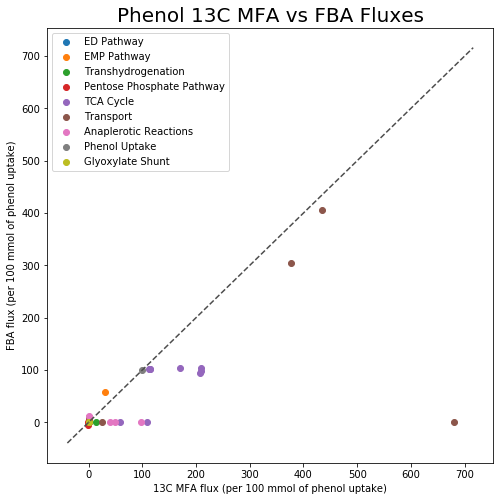

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

for pathway in list(set(phenol_fluxes['Pathway'])):
    pathway_df = phenol_fluxes[phenol_fluxes['Pathway'] == pathway]
    
    measured_flux_list = list(pathway_df['Flux'])
    simulated_flux_list = list(pathway_df['FBA Value'])
    
    ax.scatter(measured_flux_list, simulated_flux_list, label=pathway)


# Dashed line
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, ls="--", c=".3")

plt.title(r'Phenol 13C MFA vs FBA Fluxes', fontSize=20)
plt.xlabel(r'13C MFA flux (per 100 mmol of phenol uptake)')
plt.ylabel(r'FBA flux (per 100 mmol of phenol uptake)')
plt.legend()
plt.show()